In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2757,0197-PNKNK,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Bank transfer (automatic),84.45,5848.6,No
2743,2323-ARSVR,Male,0,Yes,No,67,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,111.05,7321.05,No
339,1343-EHPYB,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.40,6603,Yes
1239,0319-QZTCO,Female,0,Yes,Yes,3,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),58.70,168.6,No
4523,9518-XXBXE,Male,1,Yes,No,10,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,75.30,720.45,No


In [3]:
df.drop('customerID', axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.shape

(7043, 20)

In [9]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_9320\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

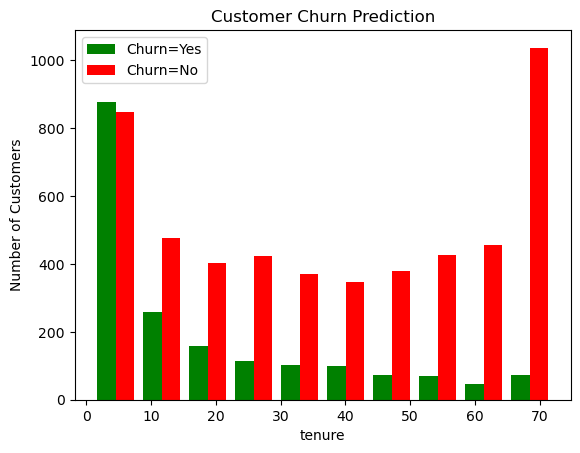

In [15]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()

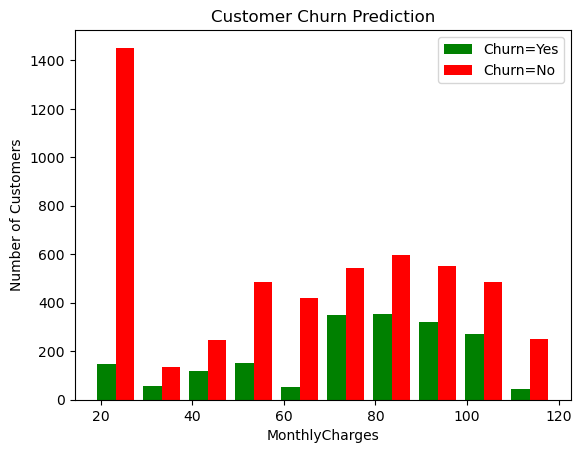

In [16]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [17]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column}:{df[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   

In [19]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_9320\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\KIRAN\AppData\Local\Temp\ipykernel_9320\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [20]:
print_unique_col_values(df1)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


In [21]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0},inplace=True)

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_9320\2999861550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0},inplace=True)


In [22]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_9320\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [24]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [25]:
pd.get_dummies(data=df1,columns=['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [26]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
df1.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7016,1,0,0,0,1,1,0,DSL,0,1,0,0,0,0,Month-to-month,0,Electronic check,49.95,49.95,0
3578,1,0,0,0,40,1,0,DSL,1,1,0,0,1,0,Month-to-month,0,Mailed check,65.10,2586.00,0
68,1,0,1,1,50,1,0,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),20.15,930.90,0
6556,1,0,1,1,6,1,0,No,0,0,0,0,0,0,One year,0,Credit card (automatic),19.00,105.50,0


In [28]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [29]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2903,0,0,1,1,12,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4654,1,0,1,1,42,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5321,1,0,1,0,69,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
3984,1,0,1,1,72,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [32]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2509,1,0,1,0,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3274,1,0,0,0,0.464789,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6963,0,0,1,1,0.112676,1,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [33]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [34]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
X_train.shape

(5625, 26)

In [37]:
X_test.shape

(1407, 26)

In [38]:
len(X_train.columns)

26

In [39]:
pip install tensorflow

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        keras.layers.Dense(15,input_shape=(26,),activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')

])

    model.compile(optimizer='adam',
                     loss=loss,
                     metrics=['accuracy'])
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)

    print(model.evaluate(X_test,y_test))

    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)

    print('Classification Report: \n',classification_report(y_test,y_preds))

    return y_preds


In [41]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 9s 4ms/step - loss: 0.5129 - accuracy: 0.7340
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.7988
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4190 - accuracy: 0.8034
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8060
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4120 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4094 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4075 - accuracy: 0.8128
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4059 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4042 - accura

# Undersampling Majority Class

In [42]:
# class count

count_class_0,count_class_1=df1.Churn.value_counts()

#Divide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [43]:
count_class_0,count_class_1

(5163, 1869)

In [44]:
df_class_0.shape

(5163, 27)

In [45]:
df_class_1.shape

(1869, 27)

In [46]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
print('Random under- sampling:')
print(df_test_under.Churn.value_counts())

Random under- sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [47]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [48]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [49]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6264 - accuracy: 0.6669
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7575
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.7595
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4902 - accuracy: 0.7609
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4873 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4846 - accuracy: 0.7632
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.7676
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4774 - accuracy: 0.7726
Epoch 11/

# Method 2: Oversampling

# Minority class by duplication

In [50]:
count_class_0,count_class_1

(5163, 1869)

In [51]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

print('Random over-sampling')
print(df_test_over.Churn.value_counts())

Random over-sampling
0    5163
1    5163
Name: Churn, dtype: int64


In [52]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [53]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [54]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 3s 4ms/step - loss: 0.5428 - accuracy: 0.7315
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4986 - accuracy: 0.7546
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4911 - accuracy: 0.7593
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4866 - accuracy: 0.7581
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4835 - accuracy: 0.7631
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4795 - accuracy: 0.7662
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4757 - accuracy: 0.7686
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4731 - accuracy: 0.7692
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4710 - accuracy: 0.7741
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4681 - accura

# Method 3: Over sampling
# SMOTE (Syntheric Miniority Over Sampling Technique)

In [55]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']


In [56]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)


In [58]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [60]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [61]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [62]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 3s 4ms/step - loss: 0.5227 - accuracy: 0.7473
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4719 - accuracy: 0.7769
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4609 - accuracy: 0.7801
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4539 - accuracy: 0.7839
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4485 - accuracy: 0.7861
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4437 - accuracy: 0.7889
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.7929
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4343 - accuracy: 0.7972
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4303 - accuracy: 0.7982
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4272 - accura

# Method4: Use of Ensemble method with undersampling

In [86]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [88]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']


In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [90]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [91]:
4130/3

1376.6666666666667

In [92]:
df3=X_train.copy()
df3['Churn']=y_train

In [93]:
df3_class_0=df3[df3.Churn==0]
df3_class_1=df3[df3.Churn==1]

In [94]:
df3_class_0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [99]:
def get_train_batch(df_majority,df_minority,start,end):
    

    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    
    return X_train,y_train

In [100]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,0,1495)
y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 3s 4ms/step - loss: 0.6355 - accuracy: 0.6528
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.7475
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4964 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7639
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.7669
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4806 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4747 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.7759
Epoch 11/

In [110]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,1495,2990)
y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 3s 6ms/step - loss: 0.6251 - accuracy: 0.7047
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5192 - accuracy: 0.7562
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4957 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4878 - accuracy: 0.7642
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4843 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7642
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4728 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4699 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4686 - accuracy: 0.7732
Epoch 11/

In [111]:
X_train,y_train=get_train_batch(df3_class_0,df3_class_1,2990,4130)
y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 2s 5ms/step - loss: 0.6180 - accuracy: 0.6839
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.7552
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4923 - accuracy: 0.7628
Epoch 4/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.7643
Epoch 5/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4792 - accuracy: 0.7666
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7731
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4727 - accuracy: 0.7753
Epoch 8/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4692 - accuracy: 0.7734
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4665 - accuracy: 0.7799
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.7791
Epoch 11/

In [103]:
vote1=0
vote2=0
vote3=1
vote1+vote2+vote3

1

In [104]:
vote1=0
vote2=1
vote3=1
vote1+vote2+vote3

2

In [113]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
        n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
        if n_ones>1:
            y_pred_final[i]=1
        else:
            y_pred_final[i]=0

In [114]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1033
           1       0.46      0.81      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.70      0.72      1407



In [ ]:
Thank you ~~